<a href="https://colab.research.google.com/github/NayeraHasan/Forecasting-Models-for-Walmart-Data-Driven-Insights/blob/main/DataSet_exploration_and_Classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!pip install kagglehub

In [ ]:
import kagglehub

path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")

print("Path to dataset files:", path)


100%|██████████| 3.36M/3.36M [00:00<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/aslanahmedov/walmart-sales-forecast/versions/1


In [ ]:
import os

for file_name in os.listdir(path):
    print(file_name)


test.csv
train.csv
features.csv
stores.csv


In [ ]:
import pandas as pd

# Load each dataset
features = pd.read_csv(f"{path}/features.csv")
test = pd.read_csv(f"{path}/test.csv")
stores = pd.read_csv(f"{path}/stores.csv")
train = pd.read_csv(f"{path}/train.csv")

# Display the first few rows of each dataset to understand their structure
print("Features Dataset:")
print(features.head())

print("\nTest Dataset:")
print(test.head())

print("\nStores Dataset:")
print(stores.head())

print("\nTrain Dataset:")
print(train.head())

Features Dataset:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Test Dataset:
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012

In [ ]:
# Check for missing values in each dataset
print("\nMissing values in each dataset:")
print("Features:\n", features.isnull().sum(), "\n")
print("Test:\n", test.isnull().sum(), "\n")
print("Stores:\n", stores.isnull().sum(), "\n")
print("Train:\n", train.isnull().sum(), "\n")



Missing values in each dataset:
Features:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 

Test:
 Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64 

Stores:
 Store    0
Type     0
Size     0
dtype: int64 

Train:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64 



In [ ]:
# Get basic statistics of each dataset
print("\nDescriptive statistics for each dataset:")
print("Features:\n", features.describe())
print("Test:\n", test.describe())
print("Stores:\n", stores.describe())
print("Train:\n", train.describe())



Descriptive statistics for each dataset:
Features:
              Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std    

In [ ]:
# Check for any duplicate rows
print("\nChecking for duplicates in each dataset:")
print("Features Duplicates:", features.duplicated().sum())
print("Test Duplicates:", test.duplicated().sum())
print("Stores Duplicates:", stores.duplicated().sum())
print("Train Duplicates:", train.duplicated().sum())


Checking for duplicates in each dataset:
Features Duplicates: 0
Test Duplicates: 0
Stores Duplicates: 0
Train Duplicates: 0


In [ ]:
# Explore column data types for each dataset
print("\nColumn data types:")
print("Features:\n", features.dtypes, "\n")
print("Test:\n", test.dtypes, "\n")
print("Stores:\n", stores.dtypes, "\n")
print("Train:\n", train.dtypes, "\n")


Column data types:
Features:
 Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object 

Test:
 Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object 

Stores:
 Store     int64
Type     object
Size      int64
dtype: object 

Train:
 Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object 



In [ ]:
# Select only numeric columns for correlation calculations
numeric_train = train.select_dtypes(include=['number'])
numeric_features = features.select_dtypes(include=['number'])

# Check the correlation between numeric features in 'train' and 'features' datasets
print("\nCorrelation between numeric features in 'train':")
print(numeric_train.corr())

print("\nCorrelation between numeric features in 'features':")
print(numeric_features.corr())



Correlation between numeric features in 'train':
                 Store      Dept  Weekly_Sales
Store         1.000000  0.024004     -0.085195
Dept          0.024004  1.000000      0.148032
Weekly_Sales -0.085195  0.148032      1.000000

Correlation between numeric features in 'features':
                 Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
Store         1.000000    -0.020566    0.066682  -0.136967  -0.044223   
Temperature  -0.020566     1.000000    0.101354  -0.124979  -0.321888   
Fuel_Price    0.066682     0.101354    1.000000   0.066122  -0.193461   
MarkDown1    -0.136967    -0.124979    0.066122   1.000000   0.021289   
MarkDown2    -0.044223    -0.321888   -0.193461   0.021289   1.000000   
MarkDown3    -0.033279    -0.077552   -0.057168  -0.089841  -0.053555   
MarkDown4    -0.005174    -0.064194   -0.008546   0.810455  -0.046595   
MarkDown5    -0.011970    -0.003241   -0.021926   0.085967  -0.008166   
CPI          -0.209282     0.164426   -0.186696  -0.

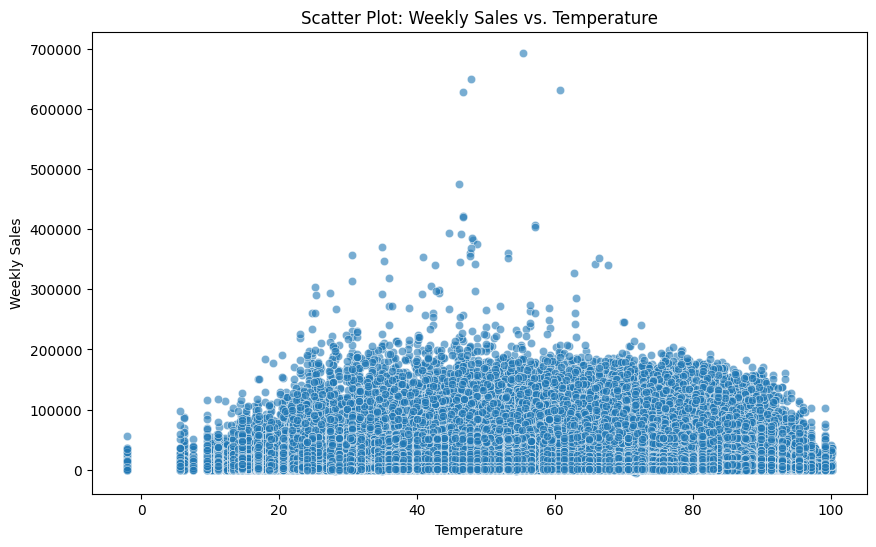

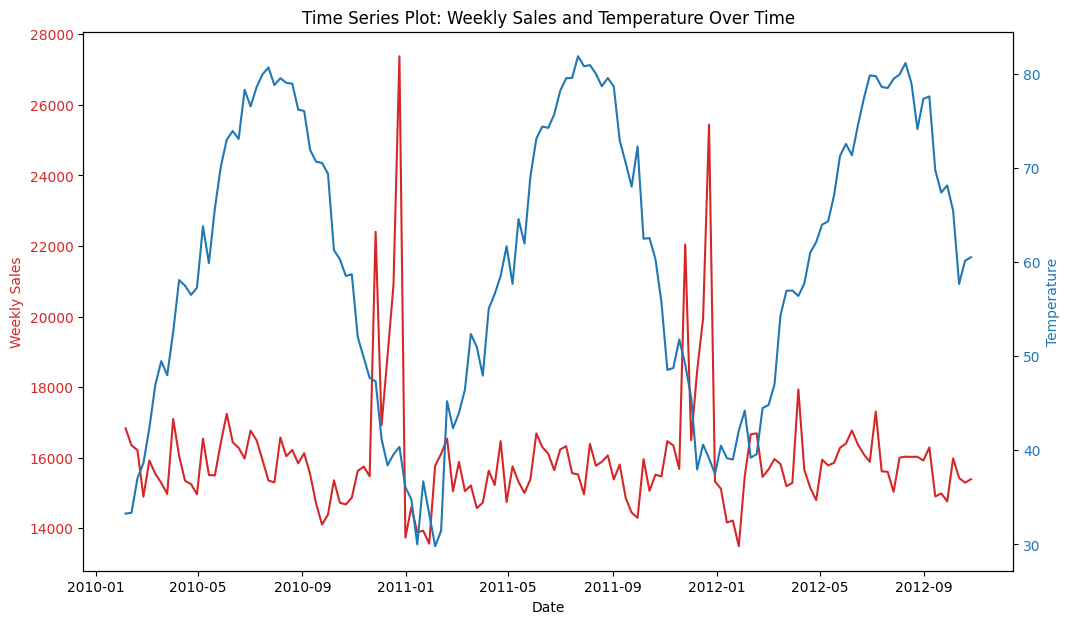

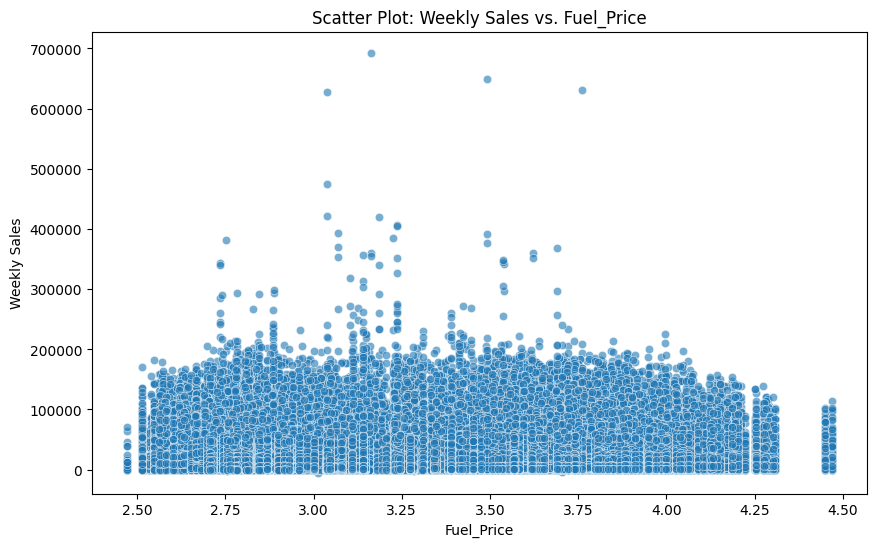

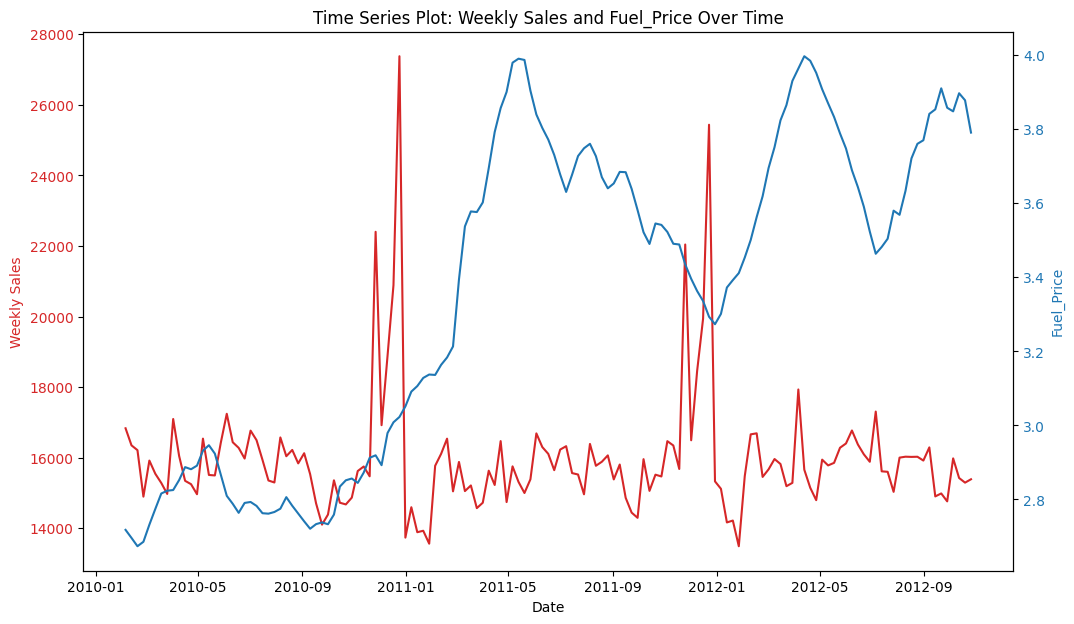

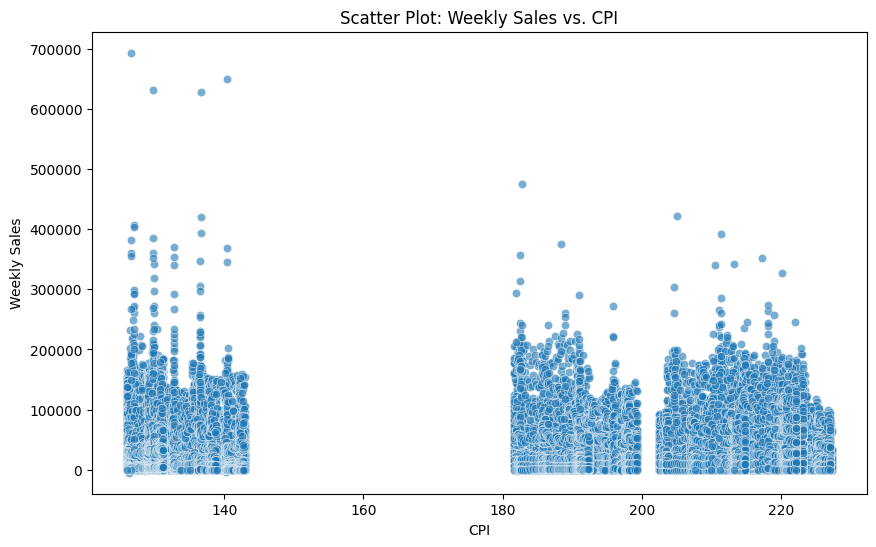

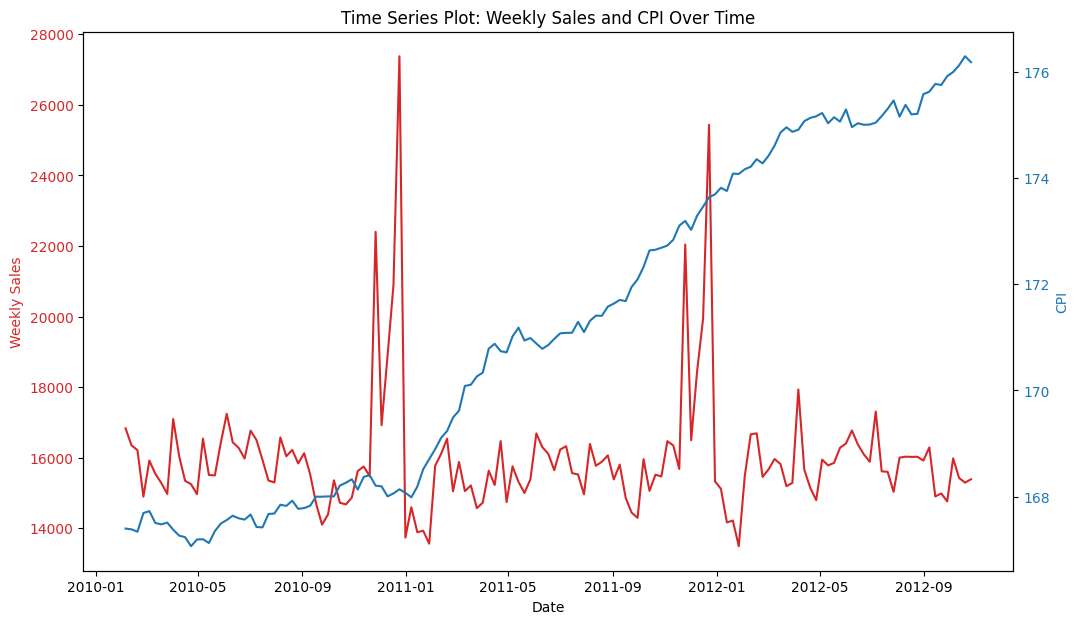

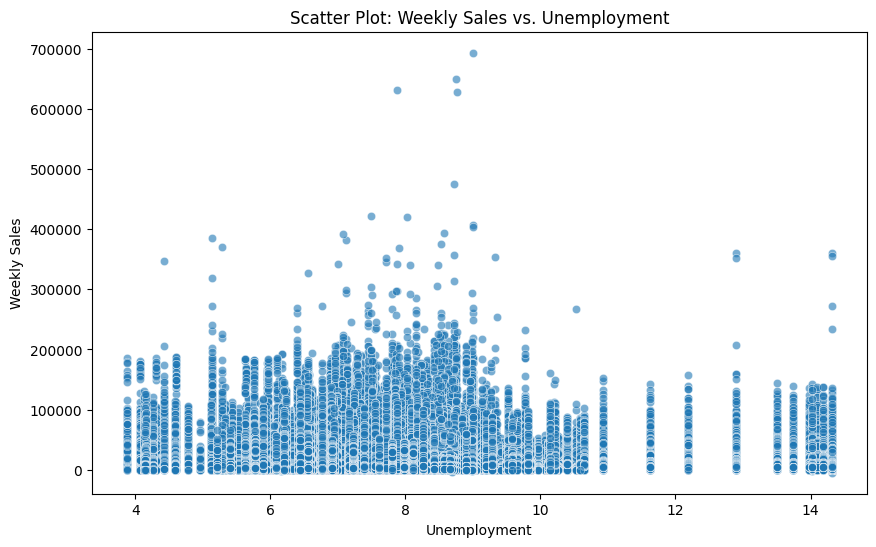

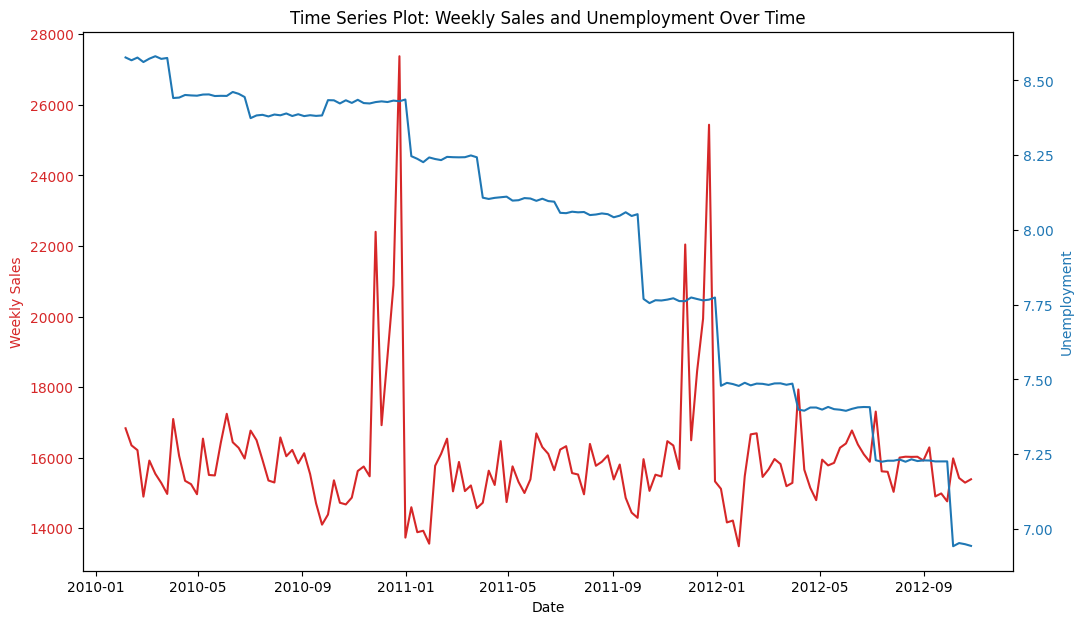

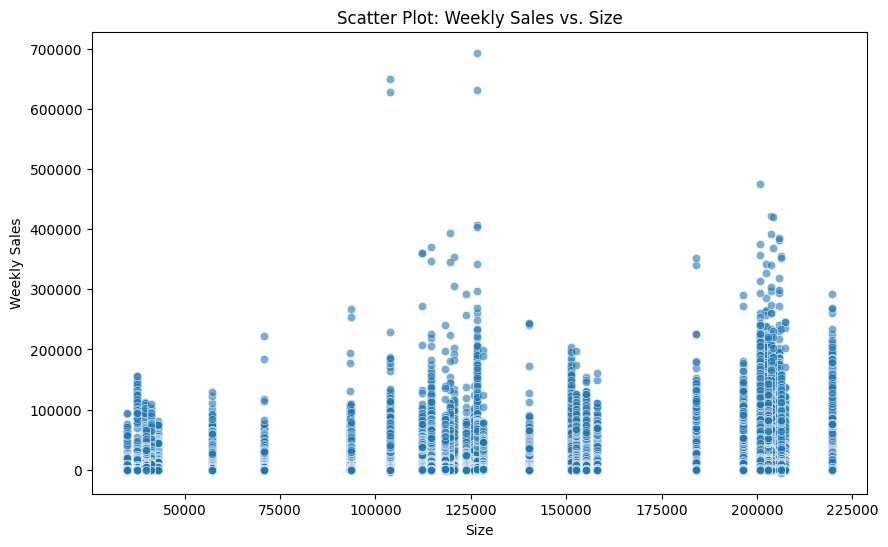

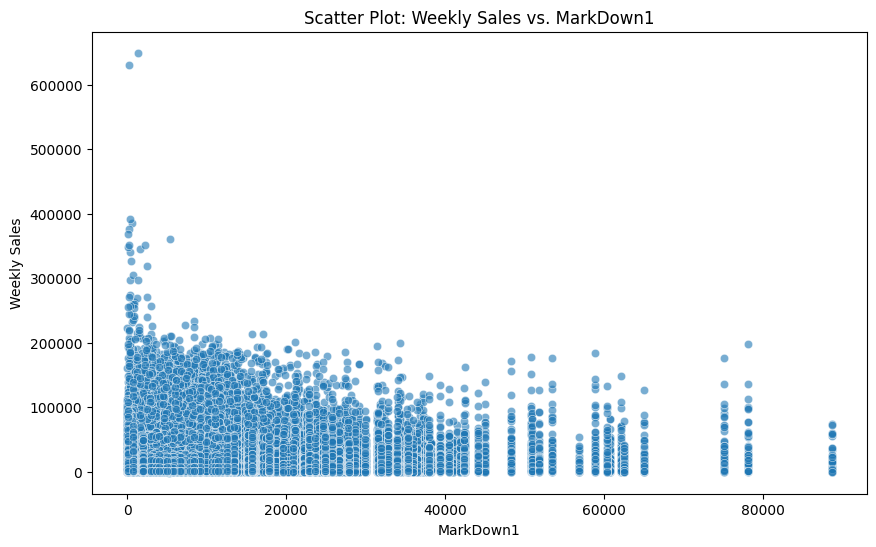

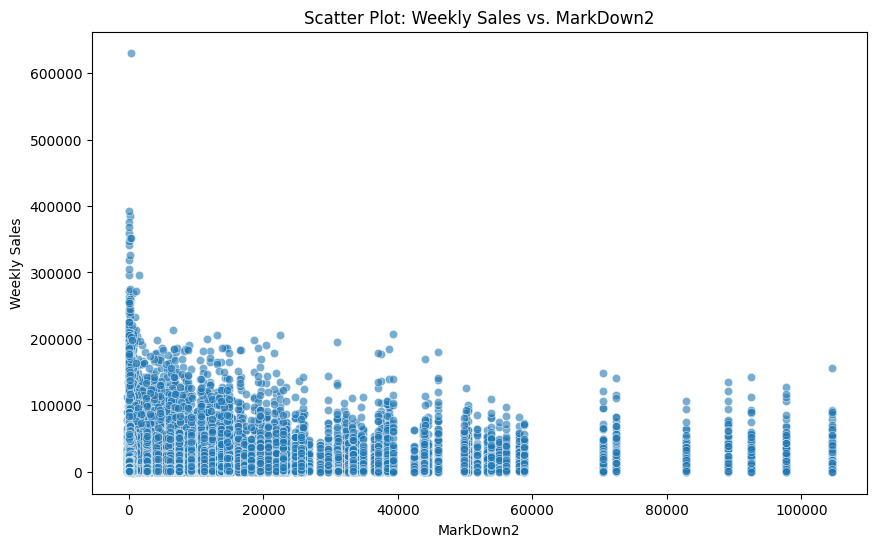

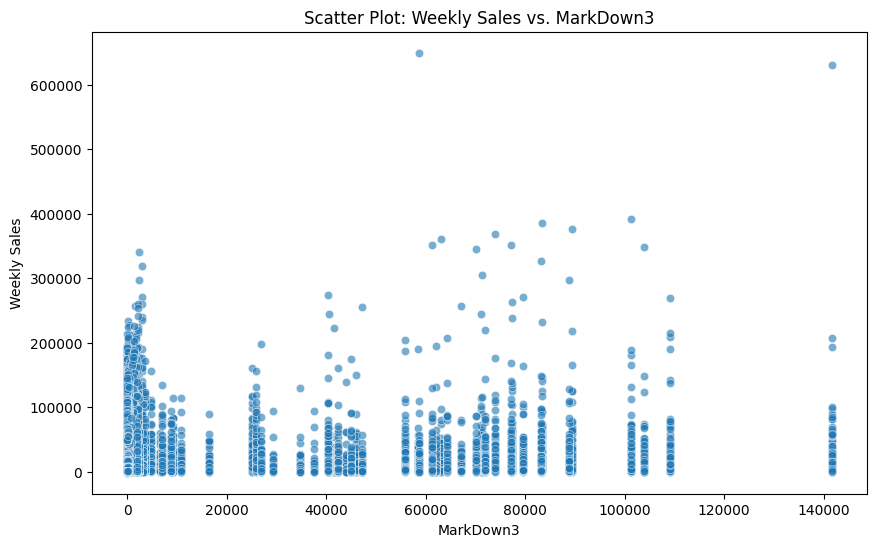

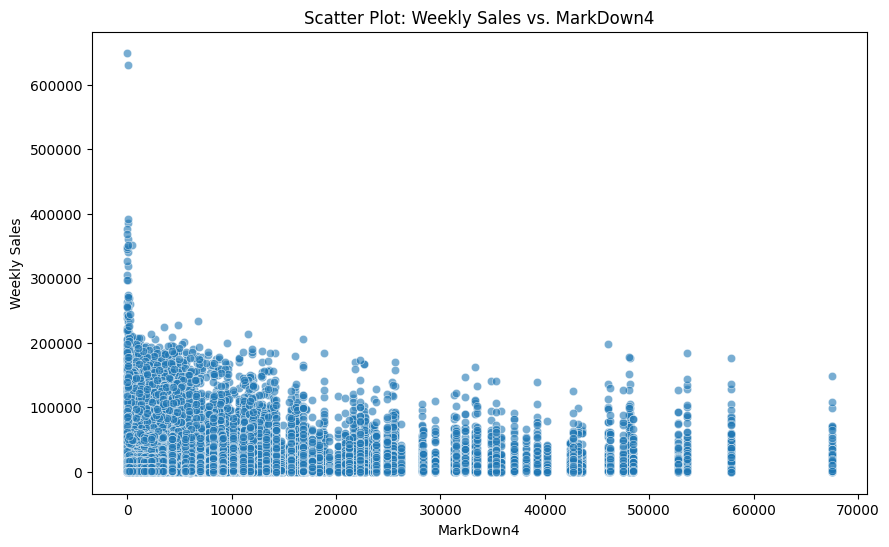

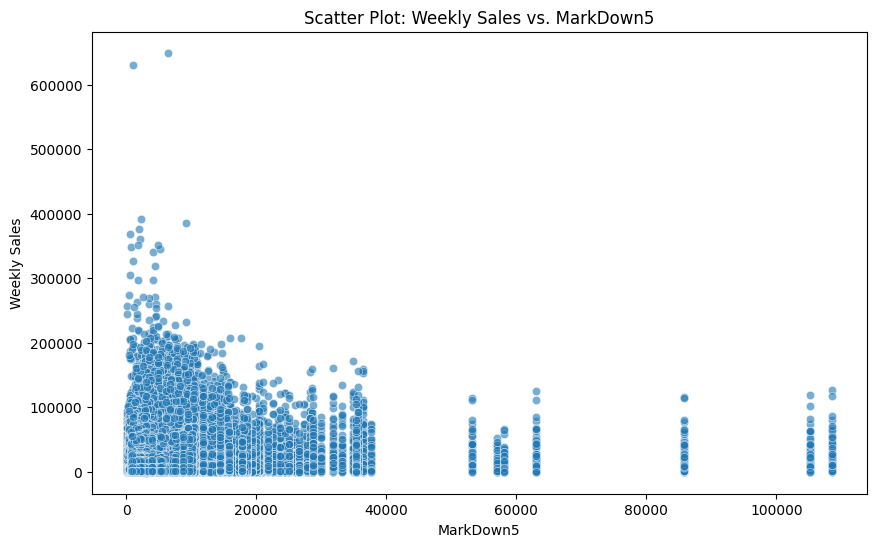

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and merge the datasets as previously described
train = pd.read_csv(f"{path}/train.csv")
features = pd.read_csv(f"{path}/features.csv")
stores = pd.read_csv(f"{path}/stores.csv")

# Convert 'Date' columns to datetime
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

# Merge datasets
full_data = pd.merge(train, features, on=['Store', 'Date'], how='left')
full_data = pd.merge(full_data, stores, on=['Store'], how='left')

# Ensure 'Weekly_Sales' is numeric and handle any potential inf or NaNs
full_data['Weekly_Sales'] = pd.to_numeric(full_data['Weekly_Sales'], errors='coerce')
full_data.dropna(subset=['Weekly_Sales'], inplace=True)  # Removing rows where sales are NaN

# List of numeric features to visualize with sales
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size',
                    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Generate scatter plots for each numeric feature vs. Weekly Sales
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=full_data, x=feature, y='Weekly_Sales', alpha=0.6)
    plt.title(f'Scatter Plot: Weekly Sales vs. {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Weekly Sales')
    plt.show()

    # Generating line plots for trends over time if applicable
    if feature in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
        # Group by Date and calculate mean for the feature and sales
        time_data = full_data.groupby('Date').agg({feature: 'mean', 'Weekly_Sales': 'mean'})
        fig, ax1 = plt.subplots(figsize=(12, 7))

        color = 'tab:red'
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Weekly Sales', color=color)
        ax1.plot(time_data.index, time_data['Weekly_Sales'], color=color)
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel(feature, color=color)  # we already handled the x-label with ax1
        ax2.plot(time_data.index, time_data[feature], color=color)
        ax2.tick_params(axis='y', labelcolor=color)

        plt.title(f'Time Series Plot: Weekly Sales and {feature} Over Time')
        plt.show()



Correlation of all features with Weekly Sales:
Weekly_Sales    1.000000
Dept            0.148032
MarkDown5       0.090362
MarkDown1       0.085251
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown2       0.024130
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Store          -0.085195
Name: Weekly_Sales, dtype: float64


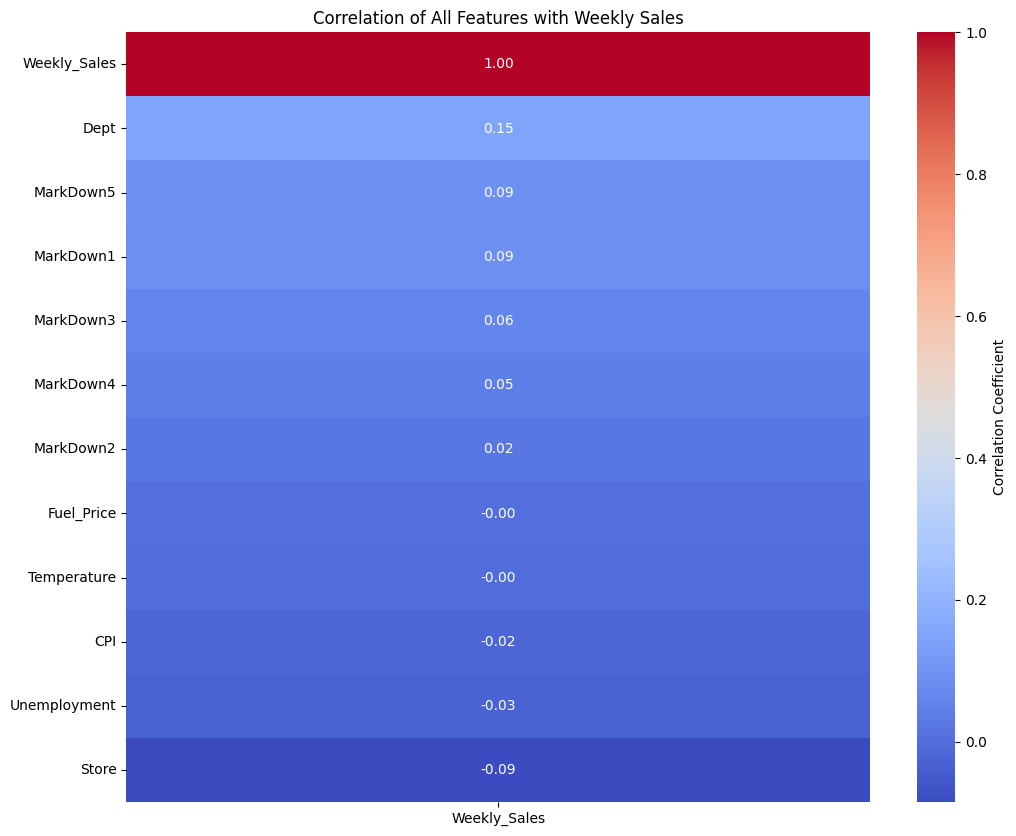

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train' and 'features' datasets are already loaded
# Convert 'Date' columns to datetime if they are not already
train['Date'] = pd.to_datetime(train['Date'], errors='coerce')
features['Date'] = pd.to_datetime(features['Date'], errors='coerce')

# Merge train and features datasets on 'Store' and 'Date'
merged_data = pd.merge(train, features, on=['Store', 'Date'], how='left')

# Select only numeric columns for correlation
numeric_data = merged_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix with 'Weekly_Sales'
correlation_with_sales = numeric_data.corr()['Weekly_Sales'].sort_values(ascending=False)
print("\nCorrelation of all features with Weekly Sales:")
print(correlation_with_sales)

# Filter to keep only relevant correlations with 'Weekly_Sales' and visualize
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False),
            annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation of All Features with Weekly Sales')
plt.show()


## Correlation of Features with Weekly Sales

This table shows how various features relate to `Weekly_Sales`:

- **Dept (0.148)**: Weak positive correlation, suggesting certain departments may have higher sales.
  
- **Markdowns**:
  - **MarkDown5 (0.090)**, **MarkDown1 (0.085)**, **MarkDown3 (0.060)**: Slight positive correlations, indicating markdowns boost sales slightly, but not strongly.

- **Economic Indicators**:
  - **CPI (-0.021)**, **Unemployment (-0.026)**: Minimal negative impact on sales, suggesting economic conditions have limited effect.

- **Other Features**:
  - **Fuel_Price (-0.0001)**, **Temperature (-0.002)**: Virtually no correlation with sales.
  - **Store (-0.085)**: Slight negative correlation, possibly due to location or size variations.

### Summary
The correlations are generally weak, with department and some markdowns having the most positive, but limited, influence on sales.


In [ ]:
import pandas as pd

store_weekly_sales = train.groupby(['Store', 'Date'], as_index=False)['Weekly_Sales'].sum()
store_weekly_sales.rename(columns={'Weekly_Sales': 'Store_Weekly_Sales'}, inplace=True)

# Display the resulting DataFrame
print(store_weekly_sales.head())


   Store       Date  Store_Weekly_Sales
0      1 2010-02-05          1643690.90
1      1 2010-02-12          1641957.44
2      1 2010-02-19          1611968.17
3      1 2010-02-26          1409727.59
4      1 2010-03-05          1554806.68


In [ ]:
# Print weekly sales for specific stores (e.g., stores 1, 2, and 3)
selected_stores = store_weekly_sales[store_weekly_sales['Store'].isin([1, 2, 3])]
print(selected_stores)


     Store       Date  Store_Weekly_Sales
0        1 2010-02-05          1643690.90
1        1 2010-02-12          1641957.44
2        1 2010-02-19          1611968.17
3        1 2010-02-26          1409727.59
4        1 2010-03-05          1554806.68
..     ...        ...                 ...
424      3 2012-09-28           389813.02
425      3 2012-10-05           443557.65
426      3 2012-10-12           410804.39
427      3 2012-10-19           424513.08
428      3 2012-10-26           405432.70

[429 rows x 3 columns]


In [ ]:
store_sales_pivot = store_weekly_sales.pivot(index='Date', columns='Store', values='Store_Weekly_Sales')
print(store_sales_pivot)


Store               1           2          3           4          5   \
Date                                                                   
2010-02-05  1643690.90  2136989.46  461622.22  2135143.87  317173.10   
2010-02-12  1641957.44  2137809.50  420728.96  2188307.39  311825.70   
2010-02-19  1611968.17  2124451.54  421642.19  2049860.26  303447.57   
2010-02-26  1409727.59  1865097.27  407204.86  1925728.84  270281.63   
2010-03-05  1554806.68  1991013.13  415202.04  1971057.44  288855.71   
...                ...         ...        ...         ...        ...   
2012-09-28  1437059.26  1746470.56  389813.02  2027620.23  310141.68   
2012-10-05  1670785.97  1998321.04  443557.65  2209835.43  343048.29   
2012-10-12  1573072.81  1900745.13  410804.39  2133026.07  325345.41   
2012-10-19  1508068.77  1847990.41  424513.08  2097266.85  313358.15   
2012-10-26  1493659.74  1834458.35  405432.70  2149594.46  319550.77   

Store               6          7           8          9        

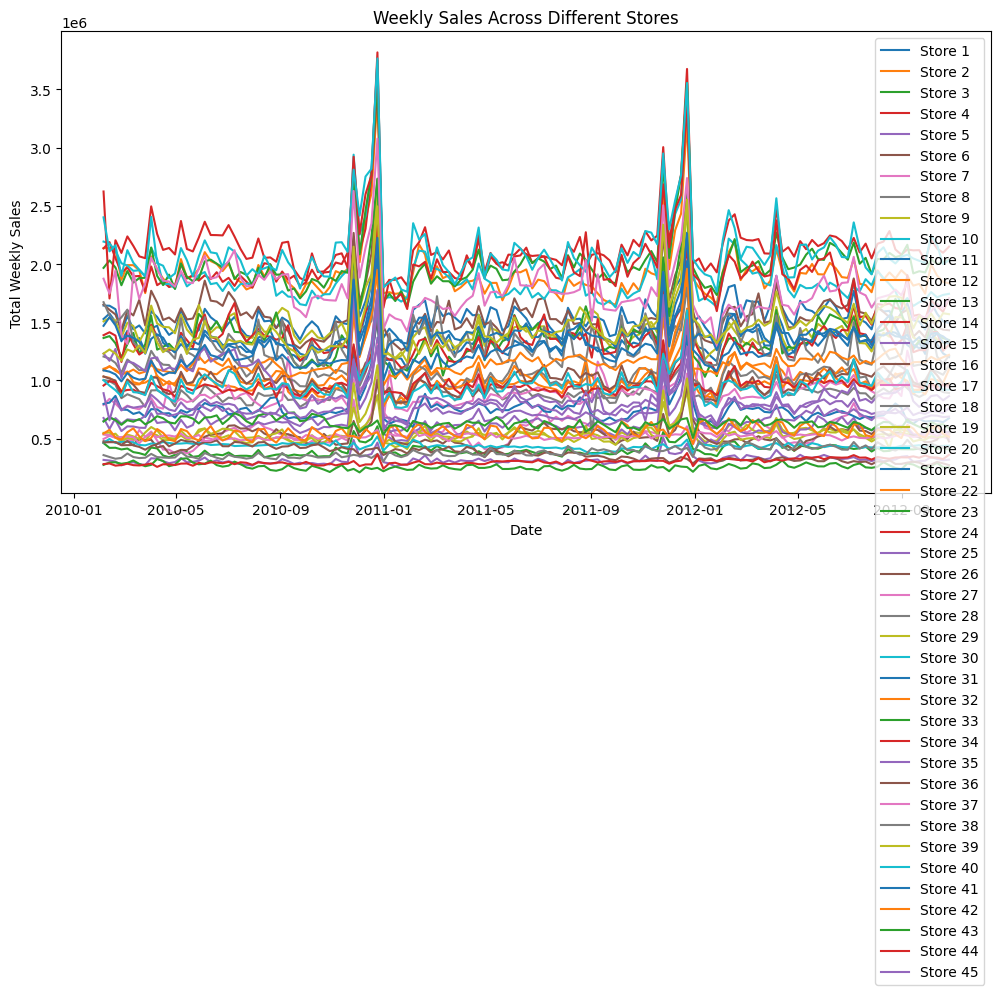

In [ ]:
import matplotlib.pyplot as plt

# Plot the weekly sales for each store over time
plt.figure(figsize=(12, 6))
for store in store_weekly_sales['Store'].unique():
    store_data = store_weekly_sales[store_weekly_sales['Store'] == store]
    plt.plot(store_data['Date'], store_data['Store_Weekly_Sales'], label=f'Store {store}')

plt.title('Weekly Sales Across Different Stores')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.show()


In [ ]:
correlations = store_weekly_sales.corr()

print("Correlation of all features with Store_Weekly_Sales:")
print(correlations['Store_Weekly_Sales'].sort_values(ascending=False))


Correlation of all features with Store_Weekly_Sales:
Store_Weekly_Sales    1.000000
Date                  0.006949
Store                -0.335332
Name: Store_Weekly_Sales, dtype: float64


In [ ]:
store_id = 1
date = '2010-02-05'

# Filter the original train dataset to see department-level sales for the specified store and date
print("Department-level sales for Store", store_id, "on", date)
department_sales = train[(train['Store'] == store_id) & (train['Date'] == date)]
print(department_sales[['Store', 'Dept', 'Date', 'Weekly_Sales']])


Department-level sales for Store 1 on 2010-02-05
       Store  Dept       Date  Weekly_Sales
0          1     1 2010-02-05      24924.50
143        1     2 2010-02-05      50605.27
286        1     3 2010-02-05      13740.12
429        1     4 2010-02-05      39954.04
572        1     5 2010-02-05      32229.38
...      ...   ...        ...           ...
9370       1    93 2010-02-05      64494.87
9513       1    94 2010-02-05      56655.39
9656       1    95 2010-02-05     106690.06
9921       1    97 2010-02-05      32153.04
10064      1    98 2010-02-05      10891.37

[73 rows x 4 columns]


In [ ]:
markdown_columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Filter rows where any MarkDown column contains negative values
negative_markdowns = features[features[markdown_columns].lt(0).any(axis=1)]

# Display the rows with negative values in MarkDown columns
print("Rows with negative MarkDown values:")
print(negative_markdowns)

# Save the filtered rows to a CSV file for further inspection (optional)
negative_markdowns.to_csv("negative_markdowns.csv", index=False)


Rows with negative MarkDown values:
      Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
657       4 2012-03-23        59.07       3.759    8806.80     -10.50   
860       5 2012-08-17        87.52       3.571    1649.56     -10.98   
873       5 2012-11-16        56.89       3.252    1631.01     -35.74   
893       5 2013-04-05        61.88       3.583    9023.29     927.32   
1063      6 2013-01-11        48.26       3.243    5510.29   33063.57   
1265      7 2013-05-31        50.70       3.870    2350.78      -7.76   
1587      9 2012-08-10        88.66       3.494    3180.78      -9.94   
1591      9 2012-09-07        87.93       3.730    4837.99      -5.96   
1611      9 2013-01-25        49.14       3.227     200.46     348.20   
1615      9 2013-02-22        45.91       3.597    2810.86    1405.04   
1748     10 2012-03-16        62.11       4.273    3977.45     -10.50   
1766     10 2012-07-20        84.45       3.589    6596.80      -1.60   
1987     11 201

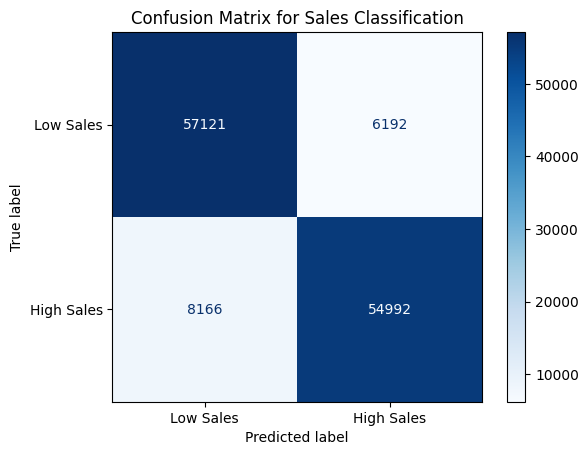

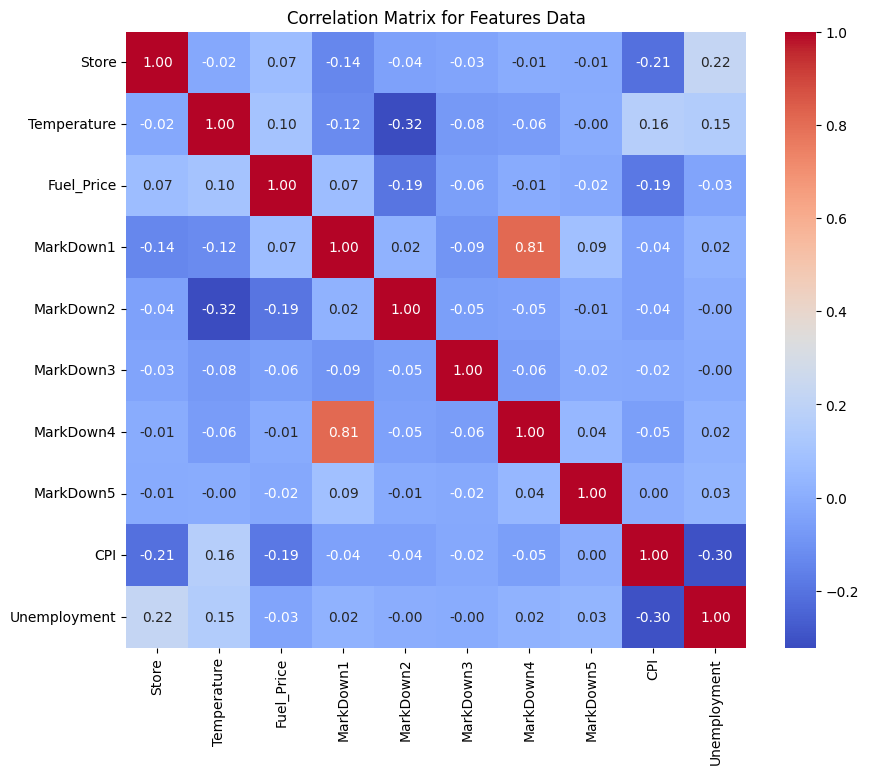

In [ ]:
median_sales = merged_data['Weekly_Sales'].median()
merged_data['Sales_Class'] = np.where(merged_data['Weekly_Sales'] >= median_sales, 1, 0)

# Select features (excluding 'Weekly_Sales' and 'Sales_Class') and the target variable
X = merged_data.select_dtypes(include=[np.number]).drop(columns=['Weekly_Sales', 'Sales_Class'])
y = merged_data['Sales_Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple classifier, e.g., RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Step 2: Create the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Sales", "High Sales"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Sales Classification")
plt.show()

# Calculate correlation matrix for the 'features' dataset
features_corr = features.select_dtypes(include=[np.number]).corr()

# Visualize the correlation matrix for 'features'
plt.figure(figsize=(10, 8))
sns.heatmap(features_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Features Data')
plt.show()